The TrOCR model is an encoder-decoder model, consisting of an image Transformer as encoder, and a text Transformer as decoder. The image encoder was initialized from the weights of BEiT, while the text decoder was initialized from the weights of RoBERTa.

Images are presented to the model as a sequence of fixed-size patches (resolution 16x16), which are linearly embedded. One also adds absolute position embeddings before feeding the sequence to the layers of the Transformer encoder. Next, the Transformer text decoder autoregressively generates tokens.

https://huggingface.co/microsoft/trocr-base-handwritten

In [11]:
import matplotlib.pyplot as plt

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
# url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open("../Samples/2.jpg").convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching 

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\generation\utils.py:1278: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [3]:
generated_text

'Techniques and good other than'

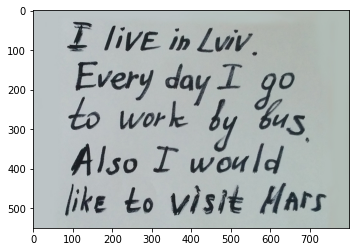

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\generation\utils.py:1278: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'0 1'

In [12]:
image = Image.open("../Samples/3.jpg").convert("RGB")

plt.imshow(image)
plt.show()


pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

generated_text

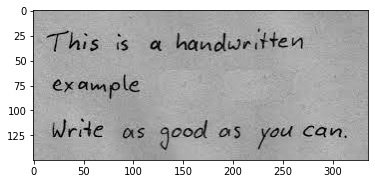

<class 'PIL.Image.Image'>


c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\transformers\generation\utils.py:1278: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'Techniques and good other than'

In [34]:
image = Image.open("../Samples/2.jpg").convert("RGB")

plt.imshow(image)
plt.show()

print(type(image))

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

generated_text

In [31]:
import cv2

def bin_thresh(img_path):
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate the mean brightness
    mean_brightness = gray_image.mean()
    print("Mean brightness:", mean_brightness)

    # Threshold to create a binary img
    threshold = 100
    binary_image = gray_image > threshold

    # show the binary img
    plt.imshow(binary_image, cmap='gray')
    plt.show()

    return binary_image

Mean brightness: 161.17634920634922


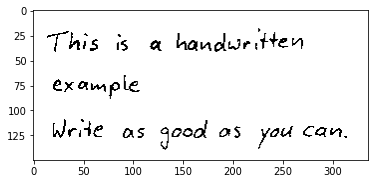

'Technionaries of hazardous rights can'

In [42]:
img_path = "../Samples/2.jpg"

binary_image = bin_thresh(img_path)

# convert to RGB
image = Image.fromarray(binary_image.astype('uint8')*255).convert('RGB')

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

generated_text